In [1]:
from __code import system
system.System.select_working_dir()
from __code.__all import custom_style
custom_style.style()

** Using Debugging Mode! **


HBox(children=(Label(value='Select Working Folder', layout=Layout(width='20%')), Select(index=8, options=('BraggEdge', 'Brianne', 'DOE_letters', 'FITSimages', 'IPTS-12534', 'IPTS_13639_resonance_shawn', 'IPTS_14832', 'IPTS_16212', 'IPTS_16259', 'IPTS_16475', 'IPTS_16893', 'IPTS_17099', 'IPTS_17685', 'IPTS_17981', 'IPTS_18580', 'IPTS_18806', 'IPTS_18813', 'IPTS_19037', 'IPTS_19558', 'IPTS_19621', 'IPTS_19626', 'IPTS_test_normalization', 'IPTS_testing_time_spectra', 'ImagesToRegisterForGian', 'Indu', 'Keita_code', 'Pour_ibeatles_video', 'ResonanceImaging', 'SENSITIVE', 'SarmaGUI', 'SphereCoordinates3D', 'TempData', 'gian', 'iBeatles_debugging'), value='IPTS_16259')))

# Create list of file name vs time stamp 

To do so, run the following notebook -> [create_list_of_file_name_vs_time_stamp](create_list_of_file_name_vs_time_stamp.ipynb)

# Sort files according to T and P parameters

In [2]:
import ipywe.fileselector
import pandas as pd

In [3]:
file_name_ui = ipywe.fileselector.FileSelectorPanel(instruction='Select file created by the create_list_of_file_name_vs_time_stamp',
                                                   start_dir = system.System.get_working_dir())
file_name_ui.show()

HTML(value='Please wait...')

VBox(children=(Label(value='Select file created by the create_list_of_file_name_vs_time_stamp', layout=Layout(width='250px')), HBox(children=(HBox(children=(Text(value='/Volumes/my_book_thunderbolt_duo/IPTS/IPTS_18813', description='Location: ', layout=Layout(width='300px'), placeholder=''), Button(description='Jump', layout=Layout(margin='5px 10px', width='100px'), style=ButtonStyle())), layout=Layout(border='1px solid lightgrey', margin='5px 50px 5px 5px', padding='3px')),)), VBox(children=(Select(description='Select', layout=Layout(width='750px'), options=(' .', ' ..', ' .DS_Store                              |     Tue Jan 30 16:04:04 2018', ' DF                                     |     Directory', ' OB                                     |     Directory', ' Sample2_Ethane                         |     Directory', ' Sample3_Methane                        |     Directory', ' Sample_2                               |     Directory', ' Sample_2_light                         |     Directory', ' Sample_2_light_timestamp_infos.txt     |     Wed Jan 31 11:57:35 2018'), value=' .'), HBox(children=(Button(description='Enter directory', layout=Layout(margin='5px 40px'), style=ButtonStyle()), Button(description='Select', layout=Layout(margin='5px 40px'), style=ButtonStyle())))), layout=Layout(border='1px solid lightgrey', margin='5px', padding='10px'))))

In [4]:
list_of_filename_vs_timestamp = file_name_ui.selected
pd_file_vs_timestamp = pd.read_csv(list_of_filename_vs_timestamp)
pd_file_vs_timestamp.columns = ['filename','time_stamp_s','time_human_readable','time_offset_s']
list_of_files = pd_file_vs_timestamp['filename']
pd_file_vs_timestamp.head()

,filename,time_stamp_s,time_human_readable,time_offset_s
0,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS_188...,2.147299e+09,2038-01-16 18:51:58,0.0
1,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS_188...,2.147299e+09,2038-01-16 18:52:33,35.0
2,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS_188...,2.147299e+09,2038-01-16 18:56:33,275.0
3,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS_188...,2.147299e+09,2038-01-16 18:57:08,310.0
4,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS_188...,2.147299e+09,2038-01-16 18:57:43,345.0


### Parse the file names

In [29]:
import os, re
from collections import OrderedDict

my_re = r"\w*_(?P<temperature>\w+)_(?P<pressure>\w+)_\d{4}_(?P<digit>\d{4}).tiff$"
exp_dict = OrderedDict()
_new_exp = {'list_of_files': [], 
            'T':'', 
            'P':'', 
            'list_of_images':[], 
            'working_image': {'type': '',
                              'image': []},
            'folder': ''}

previous_T = ''
previous_P = ''

exp_index = 0
for _index, _file in enumerate(list_of_files):
    _path = os.path.dirname(_file)
    _file = os.path.basename(_file)
    m = re.match(my_re, _file)
    if m is None:
        continue

    if m:
        _T = m.group('temperature')
        _P = m.group('pressure')
    else:
        _T = 'N/A'
        _P = 'N/A'

    # first entry
    if _new_exp['list_of_files'] == []:
        _new_exp['list_of_files'] = [os.path.basename(_file)]
        _new_exp['folder'] = _path
        
        _new_exp['T'] = _T
        previous_T = _T
            
        _new_exp['P'] = _P
        previous_P = _P
            
    # after first entry
    else:
        
        if (_T == previous_T) and (_P == previous_P):
            # found the same T and P, just append file to list of files
            _new_exp['list_of_files'].append(_file)
            
        else:
            # we found a new T or new P, save previous dict and initialization of new one
            exp_dict[str(exp_index)] = _new_exp
            exp_index += 1
            _new_exp = {'list_of_files': [], 
                        'T':'', 
                        'P':'', 
                        'list_of_images':[], 
                        'working_image': {'type': '',
                                          'image': []},
                        'folder': ''}

            # start recording new entry
            _new_exp['list_of_files'] = [os.path.basename(_file)]
            _new_exp['folder'] = _path
        
            _new_exp['T'] = _T
            previous_T = _T
            
            _new_exp['P'] = _P
            previous_P = _P
        
    # last entry, force the save of the dictionary
    if _index == len(list_of_files)-1:
        exp_dict[str(exp_index)] = _new_exp
        
#exp_dict

History

In [30]:
for _key in exp_dict.keys():
    _item = exp_dict[_key]
    _t = _item['T']
    _p = _item['P']
    _nbr_files = len(_item['list_of_files'])
    
    print("T:{} and P:{} with {} files".format(_t, _p, _nbr_files))

T:cooling and P:00Bar with 66 files
T:200K and P:00Bar with 5 files
T:200K and P:94Bar with 5 files
T:200K and P:60Bar with 5 files
T:200K and P:30Bar with 5 files
T:200K and P:08Bar with 5 files
T:200K and P:04Bar with 5 files
T:200K and P:00Bar with 5 files
T:150K and P:92Bar with 6 files
T:150K and P:61Bar with 5 files
T:150K and P:30Bar with 5 files
T:150K and P:15Bar with 5 files
T:150K and P:08Bar with 10 files
T:150K and P:04Bar with 2 files


# Load the data 

In [11]:
from NeuNorm.normalization import Normalization
from ipywidgets import widgets
import matplotlib.pyplot as plt

In [12]:
%matplotlib notebook

In [37]:
w = widgets.IntProgress(description="Full Progress")
w.max = len(exp_dict.keys())
display(w)

for _index, _key in enumerate(exp_dict.keys()):
    _item = exp_dict[_key]
    _path = _item['folder']
    list_files = _item['list_of_files']
    full_list_files = [os.path.join(_path, _file) for _file in list_files]
    o_norm = Normalization()
    o_norm.load(file=full_list_files, notebook=True)
    _data = o_norm.data['sample']['data']
    _item['list_of_images'] = _data
    exp_dict[_key] = _item
    
    w.value = _index+1
    
w.close()

IntProgress(value=0, description='Full Progress', max=14)

HBox(children=(Label(value='Loading sample', layout=Layout(width='20%')), IntProgress(value=0, max=66)))

HBox(children=(Label(value='Loading sample', layout=Layout(width='20%')), IntProgress(value=0, max=5)))

HBox(children=(Label(value='Loading sample', layout=Layout(width='20%')), IntProgress(value=0, max=5)))

HBox(children=(Label(value='Loading sample', layout=Layout(width='20%')), IntProgress(value=0, max=5)))

HBox(children=(Label(value='Loading sample', layout=Layout(width='20%')), IntProgress(value=0, max=5)))

HBox(children=(Label(value='Loading sample', layout=Layout(width='20%')), IntProgress(value=0, max=5)))

HBox(children=(Label(value='Loading sample', layout=Layout(width='20%')), IntProgress(value=0, max=5)))

HBox(children=(Label(value='Loading sample', layout=Layout(width='20%')), IntProgress(value=0, max=5)))

HBox(children=(Label(value='Loading sample', layout=Layout(width='20%')), IntProgress(value=0, max=6)))

HBox(children=(Label(value='Loading sample', layout=Layout(width='20%')), IntProgress(value=0, max=5)))

HBox(children=(Label(value='Loading sample', layout=Layout(width='20%')), IntProgress(value=0, max=5)))

HBox(children=(Label(value='Loading sample', layout=Layout(width='20%')), IntProgress(value=0, max=5)))

HBox(children=(Label(value='Loading sample', layout=Layout(width='20%')), IntProgress(value=0, max=10)))

HBox(children=(Label(value='Loading sample', layout=Layout(width='20%')), IntProgress(value=0, max=2)))

# Which image to use for each group 

Should we use for each group:
* the last image
or
* the mean of all images

<IPython.core.display.Javascript object>


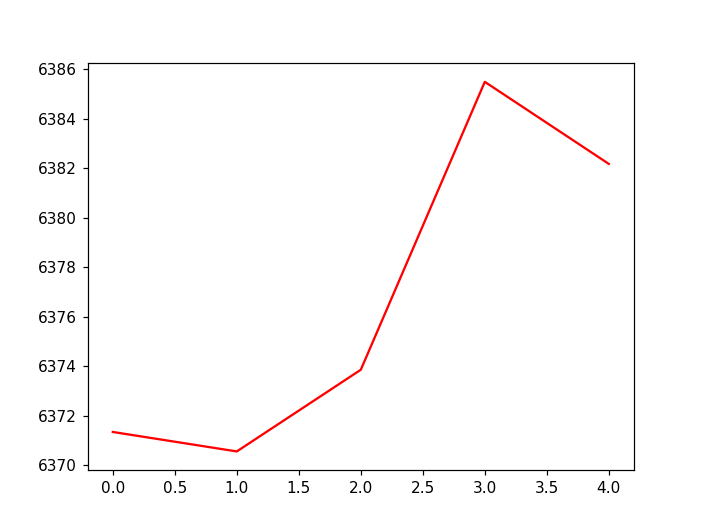

In [38]:
#working with group = 0 and 1

group = exp_dict['0']
nbr_images_in_group = len(group['list_of_images'])
mean_group_0 = []
#median_group_0 = []
std_group_0 = []

for _image in group['list_of_images']:
#     _median_value = np.median(_image)
#     median_group_0.append(_median_value)

    _mean_value = np.mean(_image)
    mean_group_0.append(_mean_value)

    _std_value = np.std(_image)
    std_group_0.append(_std_value)

###
group = exp_dict['1']
nbr_images_in_group = len(group['list_of_images'])
mean_group_1 = []
# median_group_1 = []
std_group_1 = []

for _image in group['list_of_images']:
#     _median_value = np.median(_image)
#     median_group_1.append(_median_value)

    _mean_value = np.mean(_image)
    mean_group_1.append(_mean_value)

    _std_value = np.std(_image)
    std_group_1.append(_std_value)
    
plt.figure(0)
plt.plot(std_group_1, 'r')   

In [42]:
def calculate_working_image(list_of_images):
    """Determine here if we should use the last image or a mean of all the images"""
    # TO DO
    _type = 'last_image'
    _type = 'mean'
    _image = np.mean(list_of_images, axis=0)
    
    working = {'type': _type,
               'image': _image}
    
    return working    

In [43]:
for _group_number in exp_dict.keys():
    _group = exp_dict[_group_number]
    nbr_images = len(_group['list_of_images'])
    if nbr_images == 1:
        _group['working_image']['type'] = 'last_image'
        _group['working_image']['image'] = _group['list_of_images'][0].copy()
    else:
        _list_images = _group['list_of_images']
        
        _result_working_image = calculate_working_image(_list_images)
        _group['working_image'] = _result_working_image
            

# Display images 

In [1]:
%gui qt

In [2]:
from __code.ui_builder import UiBuilder
o_builder = UiBuilder(ui_name = 'ui_file_metadata_display.ui')

from __code.file_metadata_display import Interface

pyuic5 /Users/j35/git/IPTS/python_notebooks/ui/ui_file_metadata_display.ui -o /Users/j35/git/IPTS/python_notebooks/__code/ui_file_metadata_display.py


In [3]:
o_gui = Interface()
o_gui.show()

Leaving Parameters Selection UI
